<a href="https://colab.research.google.com/github/MayankRawat06/FutureProductPrices/blob/main/fbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.5 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import pandas as pd
import numpy as np
import prophet
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [ ]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
27688,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.0,13498.67,13066.82,431.85,0.0,organic,2018.0,WestTexNewMexico
27689,8,2018-01-28,1.71,13888.04,1191.7,3431.50,0.0,9264.84,8940.04,324.80,0.0,organic,2018.0,WestTexNewMexico
27690,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018.0,WestTexNewMexico
27691,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018.0,WestTexNewMexico
27692,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018.0,WestTexNewMexico


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27693 entries, 0 to 27692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    27693 non-null  int64  
 1   Date          27693 non-null  object 
 2   AveragePrice  27693 non-null  float64
 3   Total Volume  27693 non-null  float64
 4   4046          27693 non-null  object 
 5   4225          27693 non-null  float64
 6   4770          27693 non-null  object 
 7   Total Bags    27692 non-null  float64
 8   Small Bags    27692 non-null  float64
 9   Large Bags    27692 non-null  float64
 10  XLarge Bags   27692 non-null  float64
 11  type          27692 non-null  object 
 12  year          27692 non-null  float64
 13  region        27692 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,27693.000000,27693.000000,2.769300e+04,2.769300e+04,2.769200e+04,2.769200e+04,2.769200e+04,27692.000000,27692.000000
mean,24.017044,2.079865,6.115337e+05,2.099518e+05,1.780856e+05,1.342567e+05,4.163337e+04,2195.509687,2016.169291
std,15.527598,99.080721,2.972627e+06,1.022795e+06,8.675810e+05,6.523776e+05,2.184473e+05,15297.617538,0.955217
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.180000,7.676740e+03,1.677470e+03,3.079895e+03,1.519990e+03,3.754000e+01,0.000000,2015.000000
50%,23.000000,1.470000,3.154898e+04,9.461160e+03,1.415471e+04,9.914595e+03,1.536350e+03,0.000000,2016.000000
75%,38.000000,1.750000,2.480392e+05,7.183466e+04,7.882180e+04,6.122310e+04,1.300526e+04,0.000000,2017.000000
max,84.000000,16489.580000,6.250565e+07,2.047057e+07,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df = df.sort_values('Date')

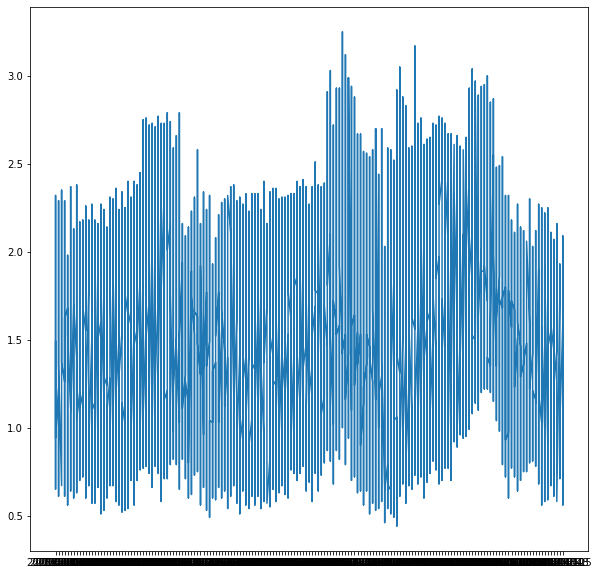

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(df['Date'], df['AveragePrice'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


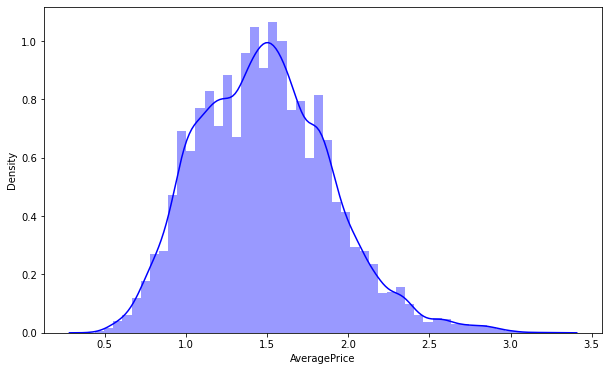

In [ ]:
plt.figure(figsize = (10, 6))
sns.distplot(df['AveragePrice'], color = 'b')

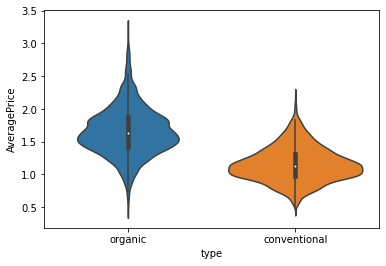

In [ ]:
sns.violinplot(y = 'AveragePrice', x = 'type', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

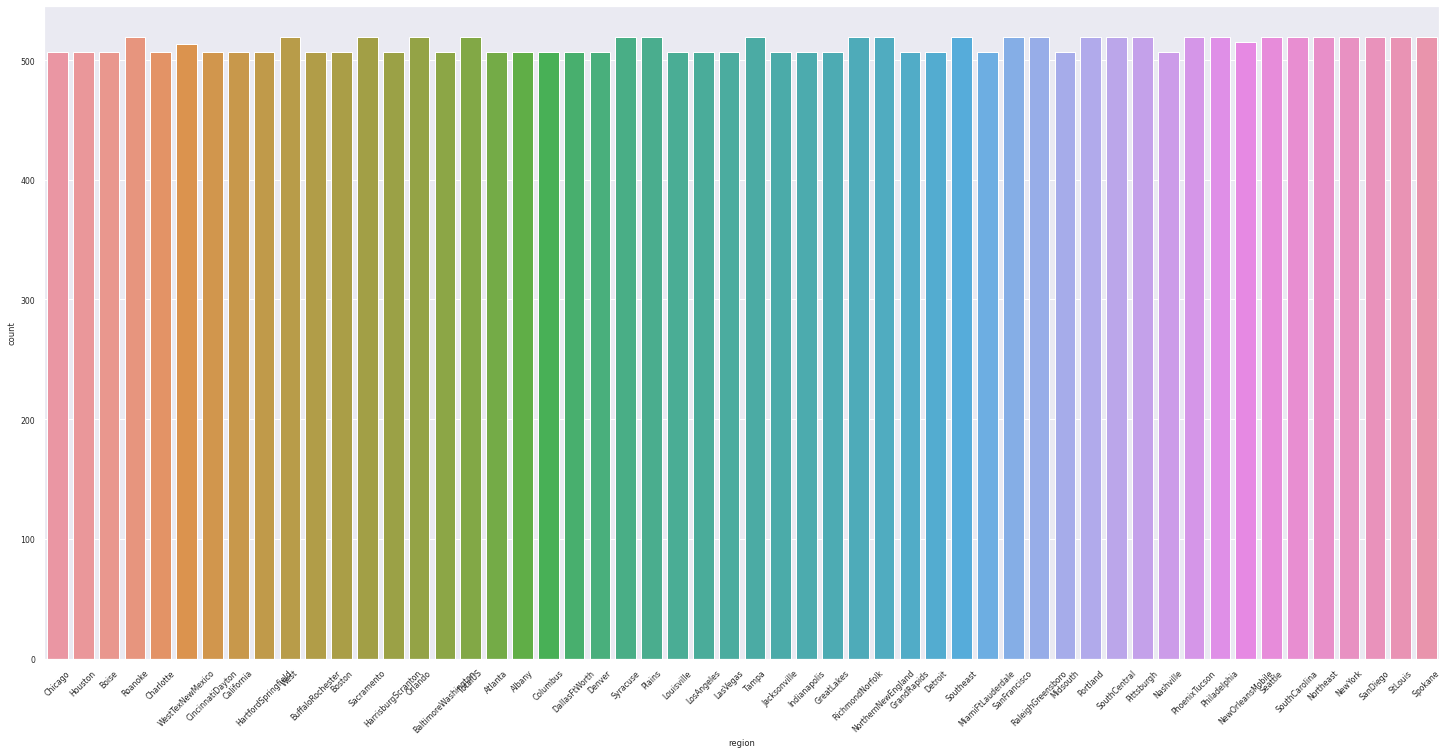

In [ ]:
sns.set(font_scale = 0.7)
plt.figure(figsize = (25, 12))
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

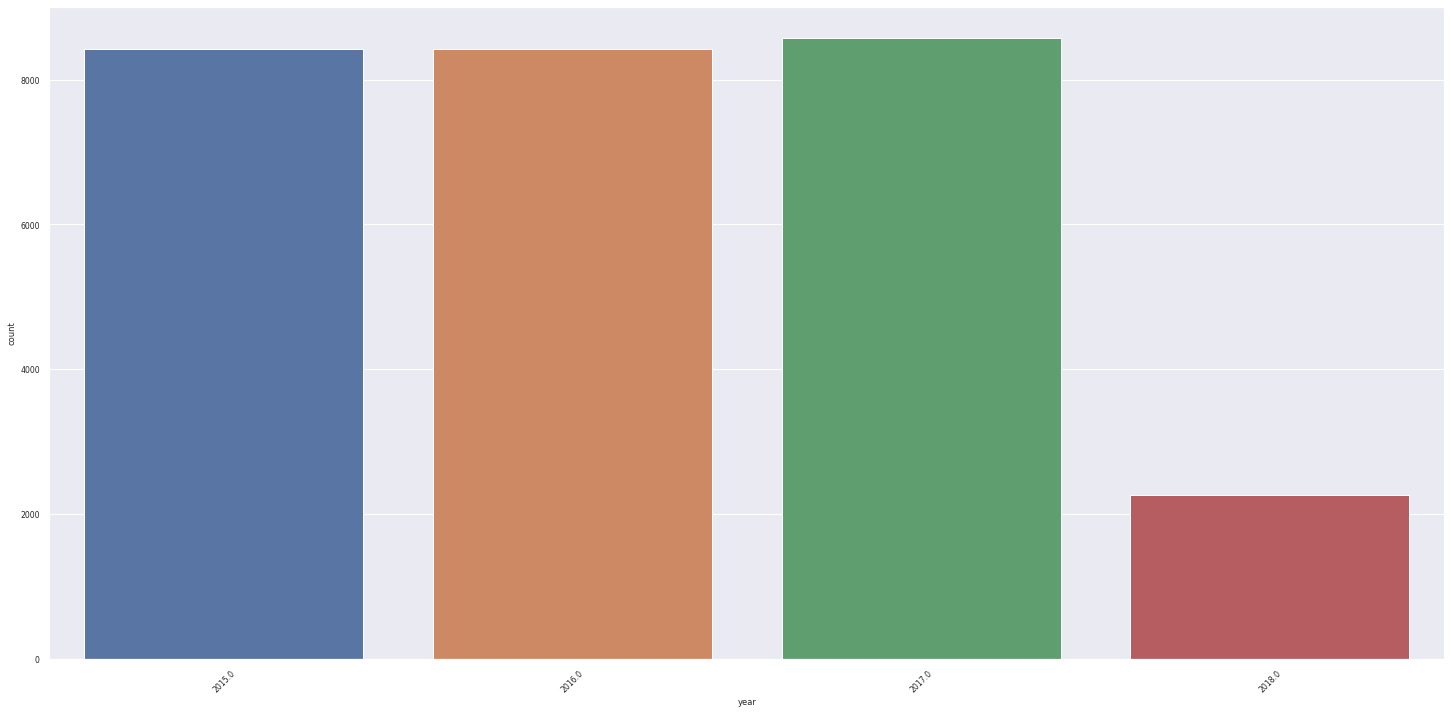

In [ ]:
sns.set(font_scale = 0.7)
plt.figure(figsize = (25, 12))
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


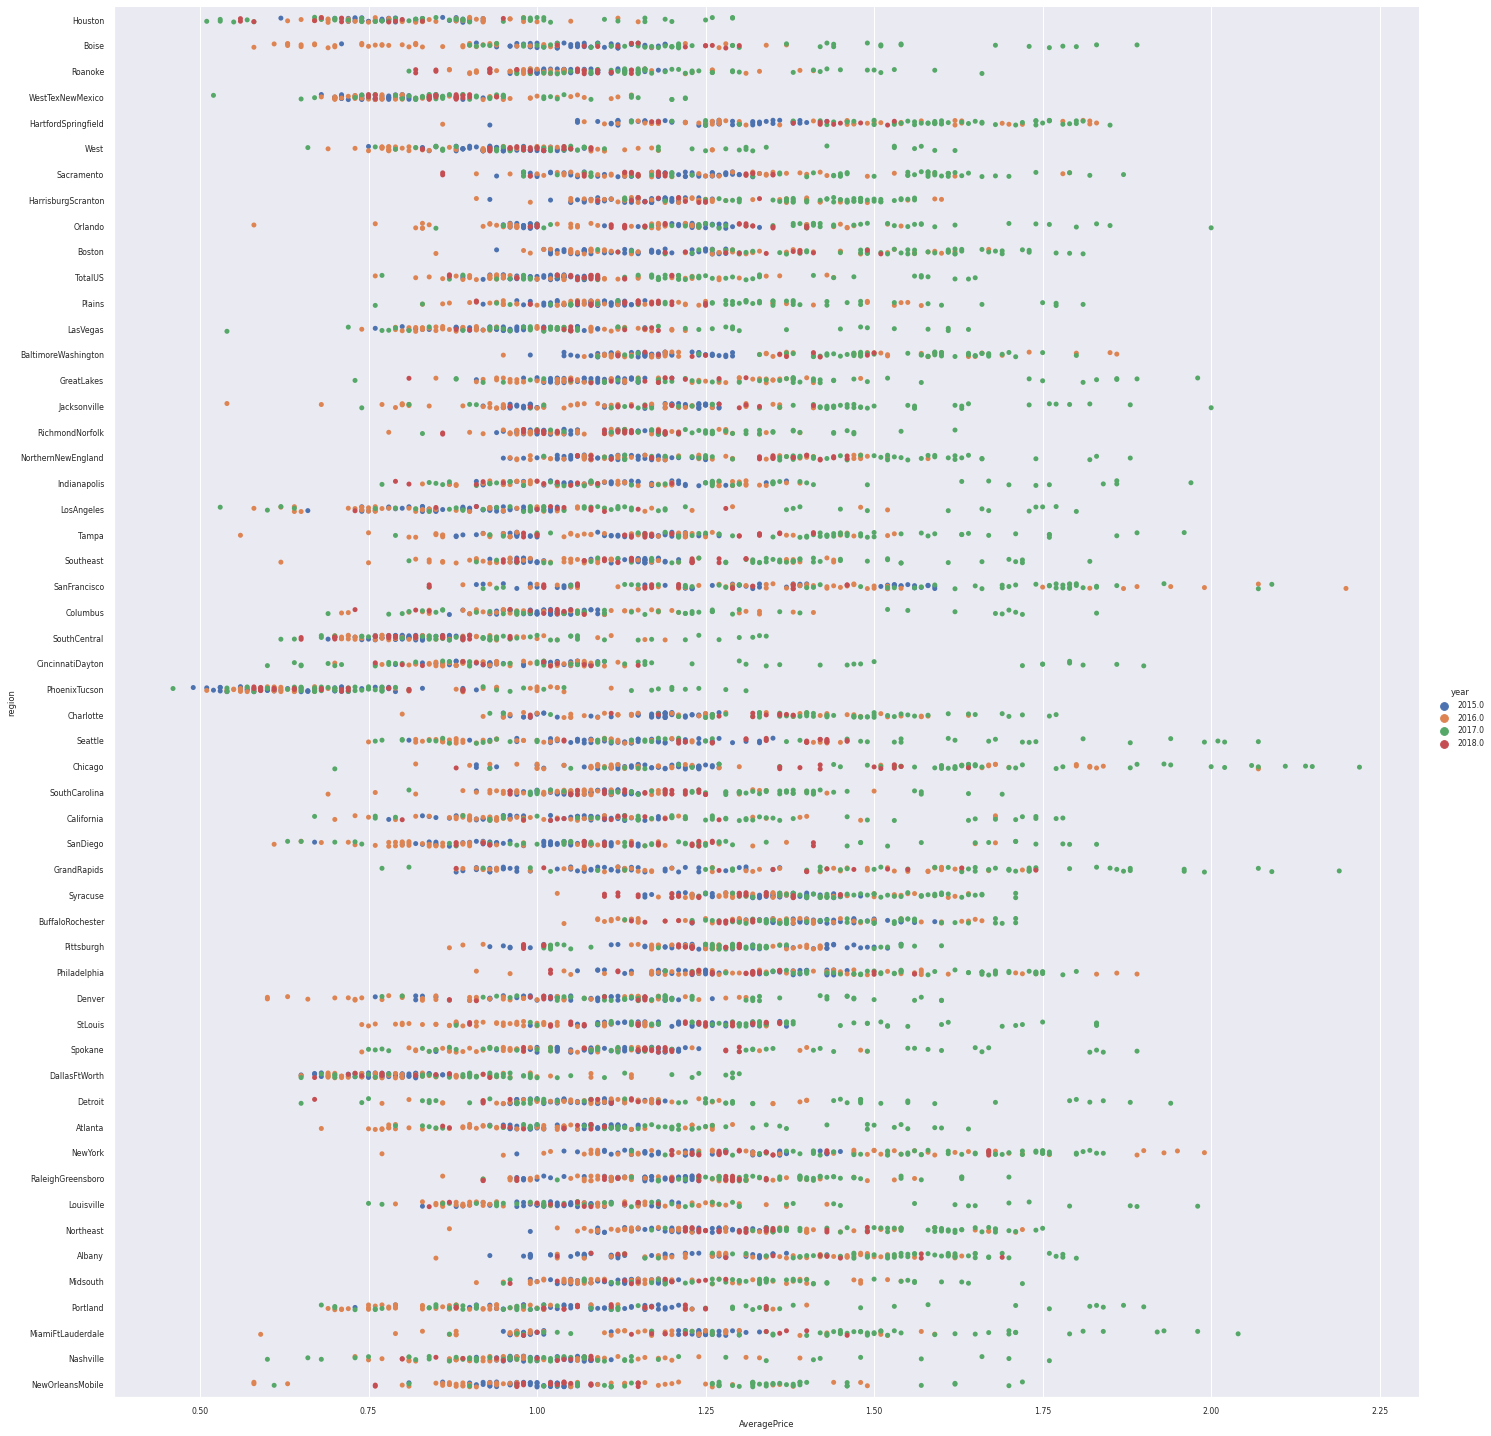

In [ ]:
conventional = sns.catplot('AveragePrice', 'region', data = df[df['type'] == 'conventional'], hue = 'year', height = 20)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


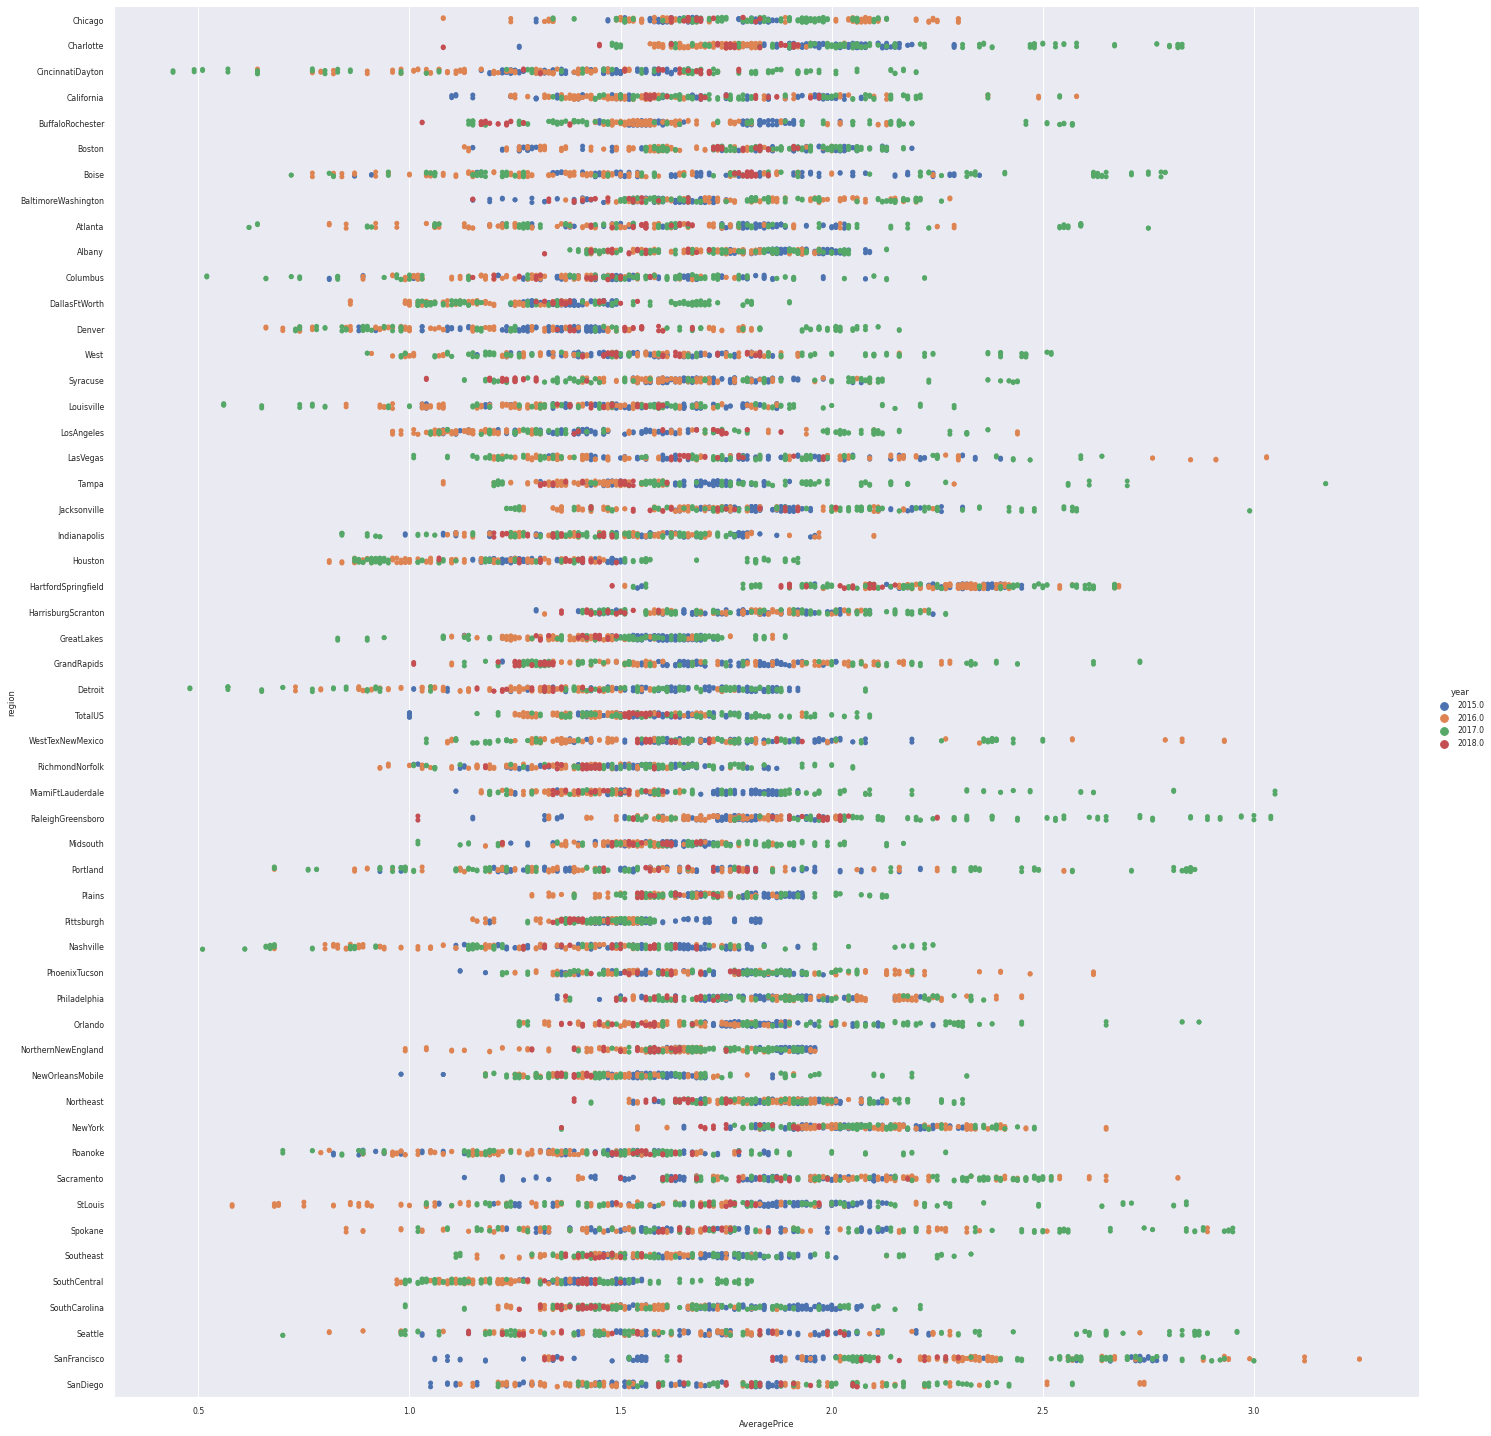

In [ ]:
organic = sns.catplot('AveragePrice', 'region', data = df[df['type'] == 'organic'], hue = 'year', height = 20)

In [ ]:
dfp = df[['Date', 'AveragePrice']]

In [ ]:
dfp.head()

,Date,AveragePrice
19037,2015-01-04,1.49
987,2015-01-04,0.71
207,2015-01-04,1.01
2079,2015-01-04,1.13
9541,2015-01-04,2.13


In [ ]:
dfp = dfp.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})

In [ ]:
dfp.head()

,ds,y
19037,2015-01-04,1.49
987,2015-01-04,0.71
207,2015-01-04,1.01
2079,2015-01-04,1.13
9541,2015-01-04,2.13


In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(dfp)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpat0e81b8/5j6lhr6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpat0e81b8/4nh9cmbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84410', 'data', 'file=/tmp/tmpat0e81b8/5j6lhr6_.json', 'init=/tmp/tmpat0e81b8/4nh9cmbo.json', 'output', 'file=/tmp/tmpat0e81b8/prophet_model4okz47yx/prophet_model-20230120052335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:23:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.596267,0.967928,1.977644,1.596267,1.596267,-0.120322,-0.120322,-0.120322,-0.120322,-0.120322,-0.120322,0.0,0.0,0.0,1.475944
1,2015-01-11,1.591436,0.983489,1.982658,1.591436,1.591436,-0.118373,-0.118373,-0.118373,-0.118373,-0.118373,-0.118373,0.0,0.0,0.0,1.473063
2,2015-01-18,1.586606,1.009550,1.960237,1.586606,1.586606,-0.119564,-0.119564,-0.119564,-0.119564,-0.119564,-0.119564,0.0,0.0,0.0,1.467042
3,2015-01-25,1.581775,0.968619,1.879159,1.581775,1.581775,-0.134279,-0.134279,-0.134279,-0.134279,-0.134279,-0.134279,0.0,0.0,0.0,1.447496
4,2015-02-01,1.576944,0.951178,1.891084,1.576944,1.576944,-0.155917,-0.155917,-0.155917,-0.155917,-0.155917,-0.155917,0.0,0.0,0.0,1.421028


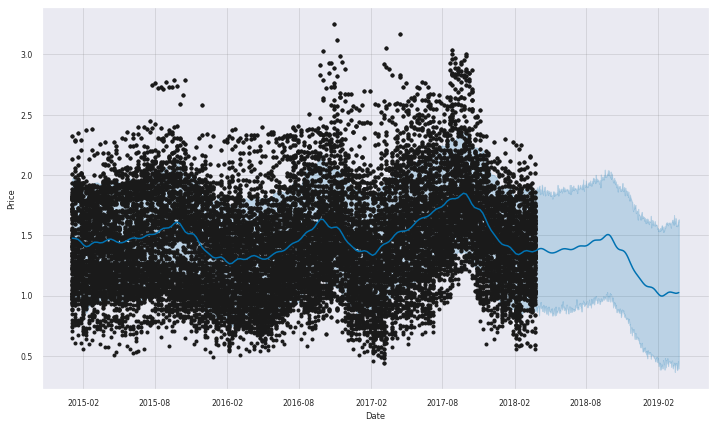

In [ ]:
figure = model.plot(forecast, ylabel = 'Price', xlabel = 'Date')

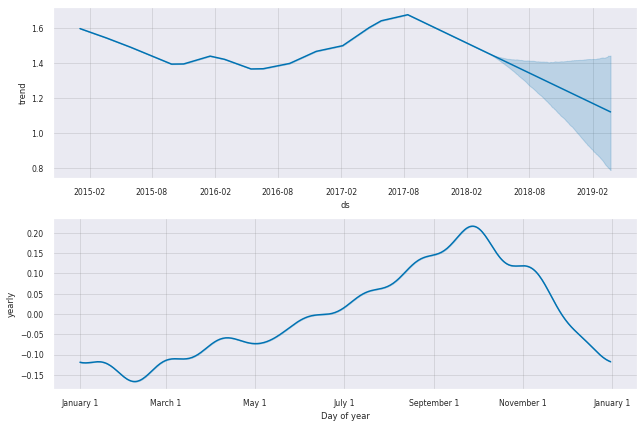

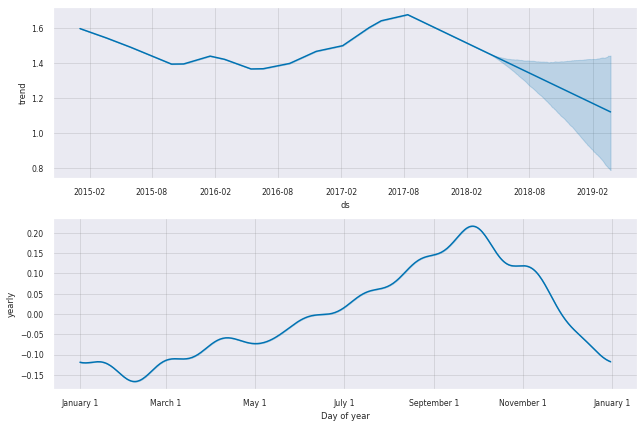

In [ ]:
model.plot_components(forecast)

In [ ]:
# for specific region
df_sample = df[df['region'] == 'West']

In [ ]:
df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015.0,West
21325,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.3,44268.18,10023.72,34244.46,0.00,organic,2015.0,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.3,44268.18,10023.72,34244.46,0.00,organic,2015.0,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015.0,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015.0,West


In [ ]:
df_sample = df_sample.sort_values('Date')

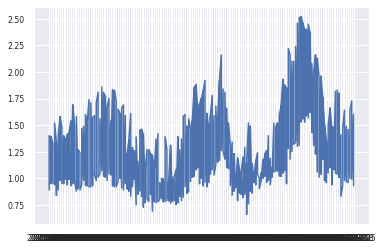

In [ ]:
plt.plot(df_sample['Date'], df_sample['AveragePrice'])

In [ ]:
df_sample = df_sample.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})

In [ ]:
df_sample = df_sample[['ds', 'y']]

In [ ]:
df_sample.head()

,ds,y
2755,2015-01-04,0.89
21325,2015-01-04,1.40
11881,2015-01-04,1.40
11880,2015-01-11,1.39
2754,2015-01-11,0.95


In [ ]:
m = Prophet()
m.fit(df_sample)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpat0e81b8/m43z3mak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpat0e81b8/zthqnx7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43333', 'data', 'file=/tmp/tmpat0e81b8/m43z3mak.json', 'init=/tmp/tmpat0e81b8/zthqnx7l.json', 'output', 'file=/tmp/tmpat0e81b8/prophet_model2v39ebhv/prophet_model-20230120054037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_sample = m.make_future_dataframe(periods = 365)
forecast_sample = m.predict(future_sample)

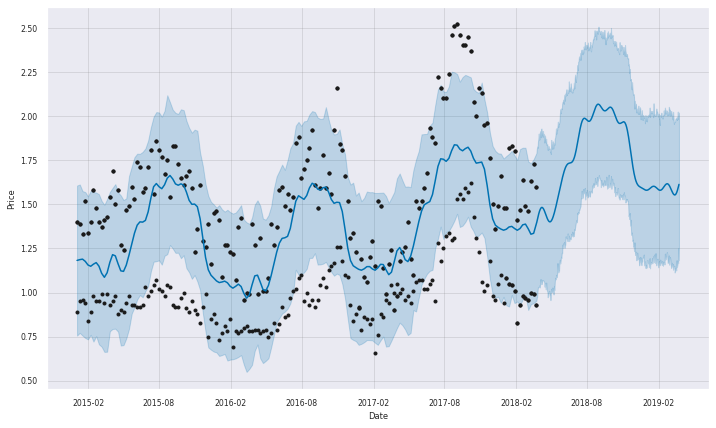

In [ ]:
figure = m.plot(forecast_sample, ylabel = 'Price', xlabel = 'Date')

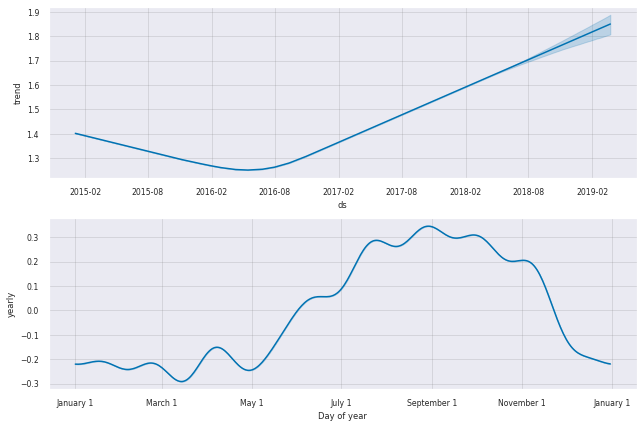

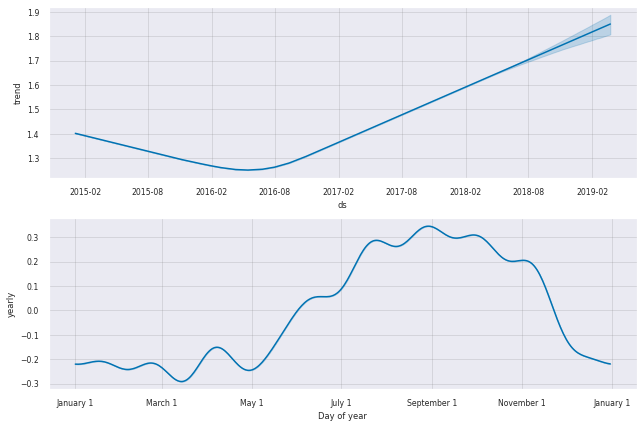

In [ ]:
m.plot_components(forecast_sample)